In [1]:
from pulp import *
import pandas as pd
import numpy as np
import cvxpy  as cp
import matplotlib.pyplot as plt

# Actividad 1

## Datos

##### Potencias mínimas

In [2]:
P1_min = 150 #[MW]
P2_min = 75 #[MW]
P3_min = 0 #[MW]

##### Potencias máximas

In [3]:
P1_max = 350 #[MW]
P2_max = 150 #[MW]
P3_max = 100 #[MW]

##### Costos fijos

In [4]:
cf1 = 1 #[$/h]
cf2 = 0.5 #[$/h]
cf3 = 0.1 #[$/h]

##### Costos variables

In [5]:
cv1 = 40 #[$/MWh]
cv2 = 75 #[$/MWh]
cv3 = 110 #[$/MWh]

##### Demanda

In [6]:
D = 500

## Problema de optmización primal:
### Minimización de costos

##### Inicialización del problema

In [7]:
prob = LpProblem("Primal", LpMinimize)

##### Definición de variables

In [8]:
P1 = LpVariable("P1")
P2 = LpVariable("P2")
P3 = LpVariable("P3")

##### Función objetivo

In [9]:
prob += (cf1 + cv1 * P1) + (cf2 + cv2 * P2) + (cf3 + cv3 * P3)

##### Restricciones

In [10]:
prob += (P1 + P2 + P3) == D # lambda
prob += - P1_min + P1 >= 0 # m1_min
prob += - P1 + P1_max >= 0 # m1_max
prob += - P2_min + P2 >= 0 # m2_min
prob += - P2 + P2_max >= 0 # m2_max
prob += - P3_min + P3 >= 0 # m3_min
prob += - P3 + P3_max >= 0 # m3_max

##### Resolución

In [11]:
prob.solve()

1

##### Estado de resolución del problema

In [12]:
print(LpStatus[prob.status])

Optimal


##### Potencias en el punto óptimo

In [13]:
for potencia in prob.variables():
    print(potencia.name , "=", potencia.varValue, "[MW]")

P1 = 350.0 [MW]
P2 = 150.0 [MW]
P3 = 0.0 [MW]


##### Costo total del sistema

In [14]:
print("Costo total = ", value(prob.objective), "[$]")

Costo total =  25251.6 [$]


##### Multiplicadores de Lagrange

In [15]:
for restriccion in prob.constraints.values():
    print("Variable dual para la restricción", restriccion, "->", restriccion.pi)

Variable dual para la restricción P1 + P2 + P3 = 500 -> 110.0
Variable dual para la restricción P1 >= 150 -> 0.0
Variable dual para la restricción -P1 >= -350 -> 70.0
Variable dual para la restricción P2 >= 75 -> 0.0
Variable dual para la restricción -P2 >= -150 -> 35.0
Variable dual para la restricción P3 >= 0 -> 0.0
Variable dual para la restricción -P3 >= -100 -> 0.0


## Problema de optmización dual:
### Maximización de los beneficios

##### Inicialización del problema

In [16]:
prob = LpProblem("Dual", LpMaximize)

##### Definición de variables

In [17]:
l = LpVariable("l")
m1_min = LpVariable("m1_min")
m1_max = LpVariable("m1_max")
m2_min = LpVariable("m2_min")
m2_max = LpVariable("m2_max")
m3_min = LpVariable("m3_min")
m3_max = LpVariable("m3_max")

##### Función objetivo

In [18]:
prob += D * l + (P1_min * m1_min + P2_min * m2_min + P3_min * m3_min) - (P1_max * m1_max + P2_max * m2_max + P3_max * m3_max)

##### Restricciones

In [19]:
prob += (l + m1_min - m1_max) - cv1 <= 0 # P1
prob += (l + m2_min - m2_max) - cv2 <= 0 # P2
prob += (l + m3_min - m3_max) - cv3 <= 0 # P3
prob += -m1_min <= 0
prob += -m1_max <= 0
prob += -m2_min <= 0
prob += -m2_max <= 0
prob += -m3_min <= 0
prob += -m3_max <= 0

##### Resolución

In [20]:
prob.solve()

1

##### Estado de resolución del problema

In [21]:
print(LpStatus[prob.status])

Optimal


##### Multiplicadores de Lagrange en el punto óptimo

In [22]:
for m in prob.variables():
    print(m.name , "=", m.varValue, "[$/MWh]")

l = 75.0 [$/MWh]
m1_max = 35.0 [$/MWh]
m1_min = -0.0 [$/MWh]
m2_max = -0.0 [$/MWh]
m2_min = -0.0 [$/MWh]
m3_max = -0.0 [$/MWh]
m3_min = -0.0 [$/MWh]


##### Beneficio total del sistema

In [23]:
print("Beneficio total = ", value(prob.objective), "[$]")

Beneficio total =  25250.0 [$]


##### Multiplicadores de Lagrange

In [24]:
for restriccion in prob.constraints.values():
    print("Variable dual para la restricción", restriccion, "->", restriccion.pi)

Variable dual para la restricción l - m1_max + m1_min <= 40 -> 350.0
Variable dual para la restricción l - m2_max + m2_min <= 75 -> 150.0
Variable dual para la restricción l - m3_max + m3_min <= 110 -> -0.0
Variable dual para la restricción -m1_min <= 0 -> 200.0
Variable dual para la restricción -m1_max <= 0 -> -0.0
Variable dual para la restricción -m2_min <= 0 -> 75.0
Variable dual para la restricción -m2_max <= 0 -> 0.0
Variable dual para la restricción -m3_min <= 0 -> -0.0
Variable dual para la restricción -m3_max <= 0 -> 100.0


# Actividad 2

## Datos

### Generadores

In [25]:
Datos_gen = pd.read_excel("Datos_gen.xlsx", sheet_name="Datos_gen", index_col=0)
Datos_gen

,Pmax,Pmin,Coef_a,Coef_b,Coef_c,Cost. comb.,Unnamed: 7,Unnamed: 8
Gen Number,,,,,,,,
1,500,150,2000,25,0.05,1,NaN,H1 = coef_a + coef_bP1 + coef_cP12
2,700,200,1250,15,0.04,1,NaN,NaN
3,200,0,1700,10,0.03,1,NaN,NaN


#### Potencias mínimas

In [26]:
P1_min = Datos_gen.loc[1, "Pmin"] #[MW]
P2_min = Datos_gen.loc[2, "Pmin"] #[MW]
P3_min = Datos_gen.loc[3, "Pmin"] #[MW]
print("P1_min = {}".format(P1_min))
print("P2_min = {}".format(P2_min))
print("P3_min = {}".format(P3_min))

P1_min = 150
P2_min = 200
P3_min = 0


#### Potencias máximas

In [27]:
P1_max = Datos_gen.loc[1, "Pmax"] #[MW]
P2_max = Datos_gen.loc[2, "Pmax"] #[MW]
P3_max = Datos_gen.loc[3, "Pmax"] #[MW]
print("P1_max = {}".format(P1_max))
print("P2_max = {}".format(P2_max))
print("P3_max = {}".format(P3_max))

P1_max = 500
P2_max = 700
P3_max = 200


#### Función de costo

In [ ]:
a1 = Datos_gen.loc[1, "Coef_a"]
b1 = Datos_gen.loc[1, "Coef_b"]
c1 = Datos_gen.loc[1, "Coef_c"]
a2 = Datos_gen.loc[2, "Coef_a"]
b2 = Datos_gen.loc[2, "Coef_b"]
c2 = Datos_gen.loc[2, "Coef_c"]
a3 = Datos_gen.loc[3, "Coef_a"]
b3 = Datos_gen.loc[3, "Coef_b"]
c3 = Datos_gen.loc[3, "Coef_c"]
print("C1 = {} + {} * P1 + {} * P1 ** 2".format(a1, b1, c1))
print("C2 = {} + {} * P2 + {} * P2 ** 2".format(a2, b2, c2))
print("C3 = {} + {} * P3 + {} * P3 ** 2".format(a3, b3, c3))

### Demanda

In [152]:
Perfil_horario = pd.read_excel("Datos_gen.xlsx", sheet_name="Perfil_horario", index_col=0)
Perfil_horario

,Demanda
Hora,
1,836.92
2,805.56
3,786.94
4,781.06
5,783.02
6,794.78
7,847.70
8,903.56
9,951.58


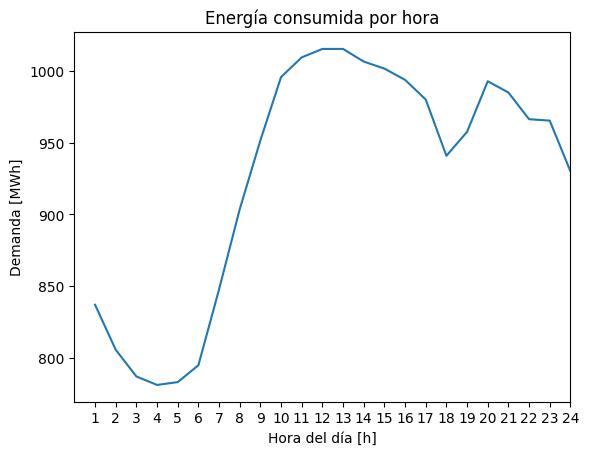

In [49]:
plt.plot(Perfil_horario)
plt.xlabel("Hora del día [h]")
plt.ylabel("Demanda [MWh]")
plt.xlim([0, 24])
plt.xticks(list(range(1,25)))
plt.title("Energía consumida por hora")
plt.show()

### Líneas de transmisión

In [54]:
Transmision = pd.read_excel("Datos_gen.xlsx", sheet_name="Transmision", index_col=0)
Transmision

,B1-B2,B2-B3,B1-B3,Unnamed: 4,Unnamed: 5,Unnamed: 6
Linea,,,,,,
Capacidad,220.0,280.0,100,MW,NaN,NaN
Reactancia,0.5,0.6,1,pu,100 MVA,220 kV


### Flujo mínimo

In [30]:
P12_min = - Transmision.loc["Capacidad", "B1-B2"]
P23_min = - Transmision.loc["Capacidad", "B2-B3"]
P13_min = - Transmision.loc["Capacidad", "B1-B3"]
print("P12_min = {}".format(P12_min))
print("P23_min = {}".format(P23_min))
print("P13_min = {}".format(P13_min))

P12_min = -220.0
P23_min = -280.0
P13_min = -100


### Flujo máximo

In [31]:
P12_max = - P12_min
P23_max = - P23_min
P13_max = - P13_min
print("P12_max = {}".format(P12_max))
print("P23_max = {}".format(P23_max))
print("P13_max = {}".format(P13_max))

P12_max = 220.0
P23_max = 280.0
P13_max = 100


### Reactancias

In [32]:
Zb = 220 ** 2 / 100
X12 = 0.5 * Zb
X23 = 0.6 * Zb
X13 = 1 * Zb
print("X12 = {}".format(X12))
print("X23 = {}".format(X23))
print("X13 = {}".format(X13))

X12 = 242.0
X23 = 290.4
X13 = 484.0


## Resolución del problema de minimización de costos

### Definción de variables

In [115]:
P1 = cp.Variable(name="P1")
P2 = cp.Variable(name="P2")
P3 = cp.Variable(name="P3")
P12 = cp.Variable(name="P12")
P13 = cp.Variable(name="P13")
P23 = cp.Variable(name="P23")
t1 = cp.Variable(name="t1")
t2 = cp.Variable(name="t2")
t3 = cp.Variable(name="t3")

### Función de costo

In [140]:
Pg = np.array([P1, P2, P3])
a = np.array([a1, a2, a3])
b = np.array([b1, b2, b3])
c = np.array([c1, c2, c3])
C = sum(a) + b @ Pg + c @ Pg ** 2
print(C)

4950.0 + 25.0 @ P1 + 15.0 @ P2 + 10.0 @ P3 + 0.05 @ power(P1, 2.0) + 0.04 @ power(P2, 2.0) + 0.03 @ power(P3, 2.0)


### Restricciones

In [141]:
D1 = 0.6 * D
D2 = 0.3 * D
D3 = 0.1 * D

# Balance de potencia en las barras (l1, l2 y l3)
rest_lck = [P1 - P12 - P13 == D1,
            P2 + P12 - P23 == D2,
            P3 + P12 + P13 == D3]
# Límite de los generadores
rest_gen_min_max = [P1 - P1_min >= 0,
                    P1_max - P1 >= 0,
                    P2 - P2_min >= 0,
                    P2_max - P2 >= 0,
                    P3 - P3_min >= 0,
                    P3_max - P3 >= 0]
# Límites de las líneas de transmisión
rest_flujo_min_max = [P12 - P12_min >= 0,
                    P12_max - P12 >= 0,
                    P23 - P23_min >= 0,
                    P23_max - P23 >= 0,
                    P13 - P13_min >= 0,
                    P13_max - P13 >= 0]
# Cálculo del flujo por las líneas
rest_calc_flujo = [P12 == (t1 - t2) / X12,
                   P13 == (t1 - t3) / X13,
                   P23 == (t2 - t3) / X23]

### Inicialización del problema

In [142]:
prob = cp.Problem(cp.Minimize(C), rest_lck + rest_gen_min_max + rest_flujo_min_max + rest_calc_flujo)

### Resolución

In [143]:
prob.solve()

16975.0

### Generaciones en el punto óptimo

In [144]:
print("P1 = {}".format(P1.value))
print("P2 = {}".format(P2.value))
print("P3 = {}".format(P3.value))

P1 = 250.0
P2 = 75.0
P3 = 100.0


### Flujos en el punto óptimo

In [146]:
print("P12 = {}".format(P12.value))
print("P13 = {}".format(P13.value))
print("P23 = {}".format(P23.value))

P12 = -2.3809523809523703
P13 = -47.61904761904763
P23 = -77.38095238095238


### Ángulos en el punto óptimo

In [147]:
print("t1 = {}".format(t1.value))
print("t2 = {}".format(t2.value))
print("t3 = {}".format(t3.value))

t1 = -6155.502482721049
t2 = -5579.312006530576
t3 = 16892.116564898
